In [227]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
import re
import gensim
from gensim.models import Word2Vec
import string
from nltk.stem import WordNetLemmatizer
from nltk.cluster import KMeansClusterer,cosine_distance,euclidean_distance
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from nltk.corpus import stopwords
from collections import OrderedDict
from nltk import word_tokenize, pos_tag
from sklearn.preprocessing import normalize

In [217]:
reviews_df = pd.read_excel("/Users/meetpatel/Documents/Stevens/Sem 3/BIA-660/Project/project_data.xlsx")

In [218]:
reviews_df.dropna(subset=['drug_review'], inplace=True)
reviews_df.reset_index(drop=False, inplace=True)

In [219]:
len(reviews_df['side effects cleaned'])

1765

In [220]:
filtered_reviews = reviews_df[reviews_df['side effects cleaned'] != 'Nil']
len(filtered_reviews)

914

In [221]:
filtered_reviews = reviews_df[(reviews_df['modality'] == 'Deontic modality') & (reviews_df['sentiments'] == 'Negative')]
len(filtered_reviews)

470

In [222]:
nlp = spacy.load("en_core_web_sm")
token_li = []
i = 0
for x in reviews_df['drug_review']:
    x = re.sub(r"won\'t", "will not", x)
    x = re.sub(r"can\'t", "cannot", x)
    x = re.sub(r"n\'t", " not", x)
    temp = [word.lemma_.strip(string.punctuation) for word in nlp(x) if len(word.lemma_) >=2]
    token_li.append(temp)
    i+=1
reviews_df['tokenized_reviews'] = token_li
reviews_df.sample(10)

,index,drug_name,review_source,drug_review,tokens,concreteness,modality,sentiments,disease,side effects,side effects grouped,side effects cleaned,side_effects_cleaned_grouped,tokenized_reviews
560,560,Januvia oral,WebMD,My husband took 100mg Januvia for 10 days with...,"['husband', 'take', '100', 'mg', 'januvia', '1...",0.161290,Epistemic modality,Negative,Diabetes,Weight Gain,Stomach-Related,Weight Gain,Metabolic-Related,"[my, husband, take, 100, mg, Januvia, for, 10,..."
1714,1715,Trulicity subcutaneous,WebMD,"I love this drug! I had some nausea at first, ...","['love', 'drug', 'nausea', '6th', 'month', 'ta...",0.078947,Epistemic modality,Positive,Diabetes,"Nausea, Loss of Appetite",Stomach-Related,"Nausea, Loss of Appetite","General,Psychological","[love, this, drug, have, some, nausea, at, fir..."
351,351,Dupixent,Drugs.com,"""Dupixent has completely changed my quality of...","['dupixent', 'completely', 'change', 'quality'...",0.197368,Epistemic modality,Positive,Eczema,Sores,Skin-Related,Soreness,Ache/Pain & Swelling,"[Dupixent, have, completely, change, my, quali..."
662,662,Januvia oral,WebMD,Have had nausia & weakness while taking Junuvi...,"['nausia', 'weakness', 'take', ' ', 'junuvia',...",0.111111,Deontic modality,Negative,Diabetes,"Nausea, Weakness",Stomach-Related,"Nausea, Weakness","General,Nervous-System-Related","[have, have, nausia, weakness, while, take, Ju..."
513,513,Januvia oral,WebMD,"This medication did help to lower my A1C, but ...","['medication', 'help', 'lower', 'a1c', '10', '...",0.067797,Deontic modality,Negative,Diabetes,"Upper Respiratory Issues, Itching",Respiratory-Issue,"Upper Respiratory Issues, Itching","Upper-Respiratory-Related,Skin-Related","[this, medication, do, help, to, lower, my, A1..."
394,394,Elidel,WebMD,I went to a doctor for a rash that had appeare...,"['go', 'doctor', 'rash', 'appear', 'hip', 'low...",0.146067,Deontic modality,Positive,Eczema,Nil,Nil,Nil,Nil,"[go, to, doctor, for, rash, that, have, appear..."
1469,1470,Invokana oral,WebMD,Is anyone experiencing indigestion taking invo...,"['experience', 'indigestion', 'take', 'invokan...",0.068966,Epistemic modality,Neutral,Diabetes,Indigestion,Stomach-Related,Indigestion,Abdomen-Related,"[be, anyone, experience, indigestion, take, in..."
199,199,Eucrisa,Drugs.com,"""Two applications and my skin felt and Looked ...","['application', 'skin', 'feel', ' ', 'look', '...",0.285714,Epistemic modality,Positive,Eczema,Nil,Nil,Nil,Nil,"[two, application, and, my, skin, feel, and, l..."
665,665,Januvia oral,WebMD,On Glumetza which is a one a day metformin 150...,"['glumetza', 'day', 'metformin', '1500mg', 'bl...",0.177215,Deontic modality,Positive,Diabetes,Dizziness,Mental-Health,Dizziness,Nervous-System-Related,"[on, Glumetza, which, be, one, day, metformin,..."
1206,1207,Onglyza oral,WebMD,No noticeable difference in BS readings. Heada...,"['noticeable', 'difference', 'bs', 'reading', ...",0.285714,Epistemic modality,Negative,Diabetes,"Headache, Sore Throat",Mental-Health,"Headache, Sore Throat","Ache/Pain & Swelling,Upper-Respiratory-Related","[no, noticeable, difference, in, BS, reading, ..."


In [223]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove('no')
stopwords.remove('not')
stopwords.remove('nor')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [224]:
pred_sentiment = []
sia = SentimentIntensityAnalyzer()
for x in reviews_df['drug_review']:
    score = sia.polarity_scores(str(x))['compound']
    if score >= 0.05:
        pred_sentiment.append(1)
    elif score <= -0.05:
        pred_sentiment.append(-1)
    else:
        pred_sentiment.append(0) 
reviews_df['pred_sentiment'] = pred_sentiment

In [225]:
sentiment_mapping = {'Negative': -1, 'Positive': 1, 'Neutral': 0}
reviews_df['Sentiments_mapped'] = reviews_df['sentiments'].map(sentiment_mapping)

In [226]:
print(classification_report(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment']))

              precision    recall  f1-score   support

          -1       0.54      0.75      0.63       663
           0       0.39      0.15      0.22       382
           1       0.62      0.60      0.61       720

    accuracy                           0.56      1765
   macro avg       0.52      0.50      0.49      1765
weighted avg       0.54      0.56      0.53      1765



In [229]:
accuracy = accuracy_score(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment'])
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


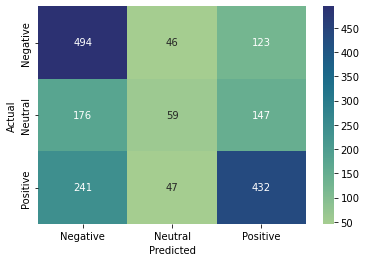

In [230]:
definitions = ['Negative','Neutral','Positive']
con_matrix = confusion_matrix(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment'])
sns.heatmap(con_matrix, annot=True, xticklabels=definitions, yticklabels=definitions, fmt=".0f", cmap="crest")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [231]:
pred_sentiment = []
sia = SentimentIntensityAnalyzer()
for x in reviews_df['tokenized_reviews']:
    score = sia.polarity_scores(' '.join(x))['compound']
    if score >= 0.05:
        pred_sentiment.append(1)
    elif score <= -0.05:
        pred_sentiment.append(-1)
    else:
        pred_sentiment.append(0) 
reviews_df['pred_sentiment'] = pred_sentiment

In [232]:
print(classification_report(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment']))

              precision    recall  f1-score   support

          -1       0.54      0.76      0.63       663
           0       0.38      0.15      0.22       382
           1       0.64      0.61      0.62       720

    accuracy                           0.57      1765
   macro avg       0.52      0.51      0.49      1765
weighted avg       0.55      0.57      0.54      1765



In [233]:
accuracy = accuracy_score(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment'])
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.57


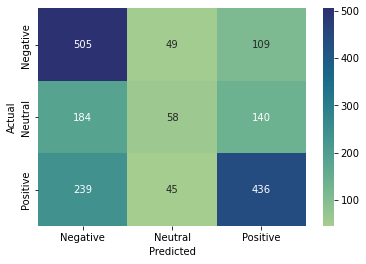

In [234]:
definitions = ['Negative','Neutral','Positive']
con_matrix = confusion_matrix(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment'])
sns.heatmap(con_matrix, annot=True, xticklabels=definitions, yticklabels=definitions, fmt=".0f", cmap="crest")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [237]:
def remove_stopwords(docs):
    
    token = [word for word in docs if word not in stopwords]
    return token

In [239]:
pred_sentiment = []
sia = SentimentIntensityAnalyzer()
for x in reviews_df['tokenized_reviews']:
    score = sia.polarity_scores(' '.join(x))['compound']
    if score >= 0.2:
        pred_sentiment.append(1)
    elif score <= -0.2:
        pred_sentiment.append(-1)
    else:
        pred_sentiment.append(0) 
reviews_df['pred_sentiment'] = pred_sentiment

In [240]:
print(classification_report(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment']))

              precision    recall  f1-score   support

          -1       0.56      0.73      0.63       663
           0       0.34      0.26      0.30       382
           1       0.67      0.56      0.61       720

    accuracy                           0.56      1765
   macro avg       0.52      0.52      0.51      1765
weighted avg       0.55      0.56      0.55      1765



In [241]:
accuracy = accuracy_score(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment'])
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


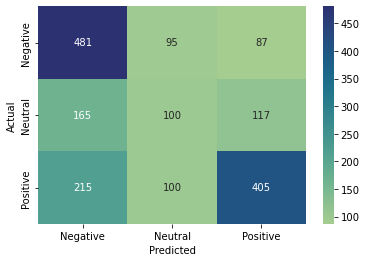

In [242]:
definitions = ['Negative','Neutral','Positive']
con_matrix = confusion_matrix(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment'])
sns.heatmap(con_matrix, annot=True, xticklabels=definitions, yticklabels=definitions, fmt=".0f", cmap="crest")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [100]:
def calculate_similarity_score(key_vectors, target_tokens, doc):
    
    target_token = [token for token in target_tokens if token in key_vectors.key_to_index]

    doc_token = [token for token in doc if token in key_vectors.key_to_index]
    
    if not target_token or not doc_token:
        return None
    
    similarity_score = key_vectors.n_similarity(target_tokens, doc_token)
    
    return similarity_score

def sentiment_analysis(key_vectors, positive_tokens, negative_tokens, docs):
    
    positive_score = docs.apply(lambda x: calculate_similarity_score(key_vectors=key_vectors, 
                                                                 target_tokens=positive_tokens, 
                                                                 doc=x))

    negative_score = docs.apply(lambda x: calculate_similarity_score(key_vectors=key_vectors, 
                                                                 target_tokens=negative_tokens, 
                                                                 doc=x))

    semantic_sentiment_score = positive_score - negative_score
    
    semantic_sentiment_polarity = semantic_sentiment_score.apply(lambda x: 1 if (x > 0) else 0)
                                          
    return positive_score, negative_score, semantic_sentiment_score, semantic_sentiment_polarity
    

In [112]:
w2v_model = Word2Vec(reviews_df['tokenized_reviews'],workers=4,vector_size=400,window=5,min_count=3)

In [113]:
positive = pd.read_csv('positive-words.txt', header=None)
negative = pd.read_csv('negative-words.txt', header=None)

positive_word_li = list(positive[0])
negative_word_li = list(negative[0])

In [110]:
for x in reviews_df['tokenized_reviews']:
    if 'a' in x:
        print(x)

In [119]:
x_train,x_test,y_train,y_test=train_test_split(reviews_df["drug_review"],reviews_df["Sentiments_mapped"],test_size=0.3,random_state=0)

In [132]:
def cluster_kmean(train_text, test_text, test_label, metric = 'Cosine', min_df=5, num=3, repeat=20):
    
    tfidf_vect = TfidfVectorizer(stop_words=stopwords, min_df=min_df, binary=True)
    train = tfidf_vect.fit_transform(train_text)
    test = tfidf_vect.transform(test_text)
    if metric == 'Cosine':
        clusterer = KMeansClusterer(num, cosine_distance, repeats=repeat)
        clusters = clusterer.cluster(train.toarray(), assign_clusters=True)
        predicted = [clusterer.classify(v) for v in test.toarray()]
    else:
        clusterer = KMeansClusterer(num, euclidean_distance, repeats=repeat)
        clusters = clusterer.cluster(train.toarray(), assign_clusters=True)
        predicted = [clusterer.classify(v) for v in test.toarray()]
    
    confusion_df = pd.DataFrame(list(zip(test_label.values, predicted)), columns=['label', 'cluster'])
    cross = pd.crosstab(index=confusion_df.cluster, columns=confusion_df.label)
    cluster = []
    for x in predicted:
        cluster.append(cross.idxmax(axis="columns")[x])
    print(classification_report(y_test, cluster))
    
    definitions = ['Negative','Neutral','Positive']
    con_matrix = confusion_matrix(y_test, cluster)
    sns.heatmap(con_matrix, annot=True, xticklabels=definitions, yticklabels=definitions, fmt=".0f", cmap="crest")
    plt.xlabel('Predicted') 
    plt.ylabel('Actual') 
    plt.show()

              precision    recall  f1-score   support

          -1       0.55      0.46      0.50       208
           0       0.00      0.00      0.00       102
           1       0.48      0.78      0.59       220

    accuracy                           0.50       530
   macro avg       0.34      0.41      0.37       530
weighted avg       0.42      0.50      0.44       530



/Users/meetpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meetpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/meetpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


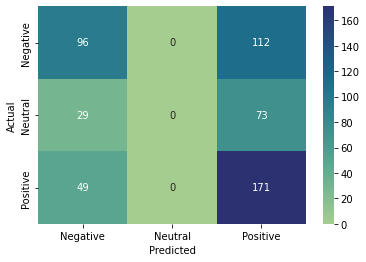

In [135]:
cluster = cluster_kmean(x_train, x_test, y_test, 'Cosine', 5, 8, 20)

In [139]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 12.1 MB/s eta 0:00:0000:01


In [243]:
from textblob import TextBlob

pred_sentiment_textblob = []
for x in reviews_df['drug_review']:
    analysis = TextBlob(str(x))
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        pred_sentiment_textblob.append(1)
    elif polarity < 0:
        pred_sentiment_textblob.append(-1)
    else:
        pred_sentiment_textblob.append(0)

reviews_df['pred_sentiment_textblob'] = pred_sentiment_textblob

In [244]:
print(classification_report(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment_textblob']))

              precision    recall  f1-score   support

          -1       0.57      0.56      0.56       663
           0       0.37      0.17      0.23       382
           1       0.55      0.73      0.63       720

    accuracy                           0.54      1765
   macro avg       0.50      0.48      0.47      1765
weighted avg       0.52      0.54      0.52      1765



In [245]:
accuracy = accuracy_score(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment'])
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


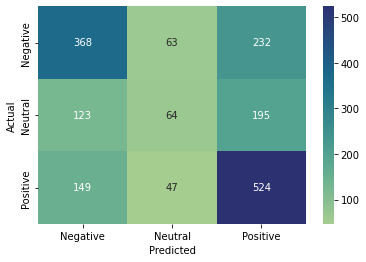

In [246]:
definitions = ['Negative','Neutral','Positive']
con_matrix = confusion_matrix(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment_textblob'])
sns.heatmap(con_matrix, annot=True, xticklabels=definitions, yticklabels=definitions, fmt=".0f", cmap="crest")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [247]:
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer

In [248]:
lemmatizer = WordNetLemmatizer()
def analyze_sentiment_sentiwordnet(tokens):
    pos_score = 0
    neg_score = 0
    
    for token in tokens:
        synsets = list(swn.senti_synsets(lemmatizer.lemmatize(token)))
        
        if synsets:
            # Consider the first synset
            synset = synsets[0]
            # Calculate the sentiment scores (positive, negative, objective)
            pos_score += synset.pos_score()
            neg_score += synset.neg_score()
    
    # Calculate the overall sentiment score
    if pos_score > neg_score:
        return 1  # Positive sentiment
    elif pos_score < neg_score:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment (or balanced)

# Apply the function to your tokenized data
reviews_df['pred_sentiment_sentiwordnet'] = reviews_df['tokenized_reviews'].apply(analyze_sentiment_sentiwordnet)

In [249]:
print(classification_report(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment_sentiwordnet']))

              precision    recall  f1-score   support

          -1       0.46      0.84      0.60       663
           0       0.30      0.07      0.11       382
           1       0.59      0.39      0.47       720

    accuracy                           0.49      1765
   macro avg       0.45      0.43      0.39      1765
weighted avg       0.48      0.49      0.44      1765



In [250]:
accuracy = accuracy_score(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment'])
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


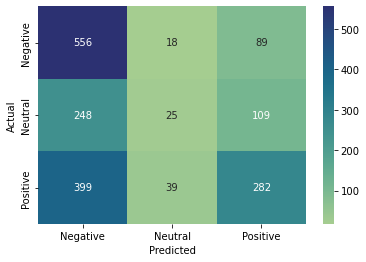

In [251]:
definitions = ['Negative','Neutral','Positive']
con_matrix = confusion_matrix(reviews_df['Sentiments_mapped'], reviews_df['pred_sentiment_sentiwordnet'])
sns.heatmap(con_matrix, annot=True, xticklabels=definitions, yticklabels=definitions, fmt=".0f", cmap="crest")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()